In [1]:
%reset -f
import utils.FrequencyDomainAnalysis as FD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

PATH = './Data/Case/48k/'

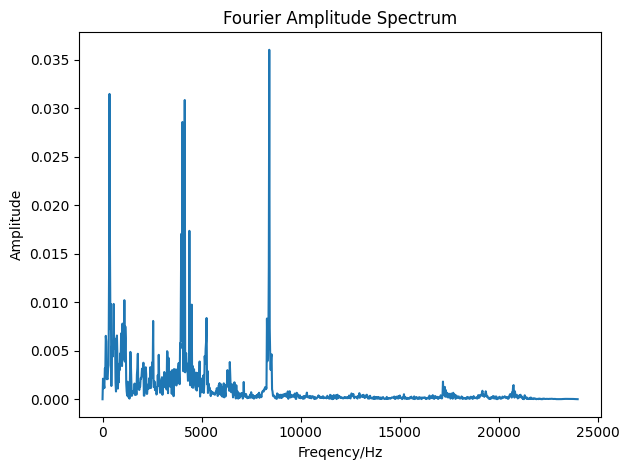

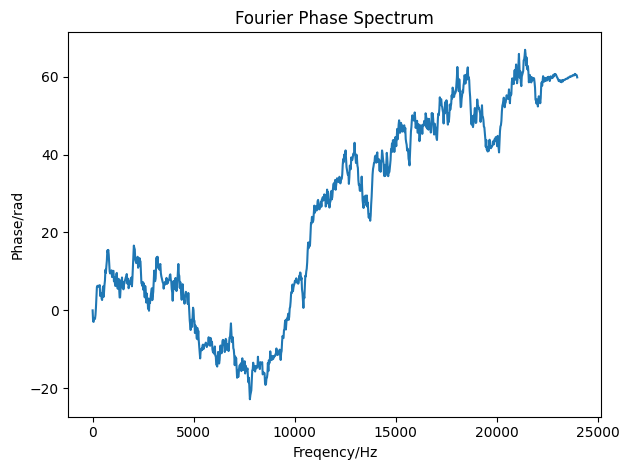

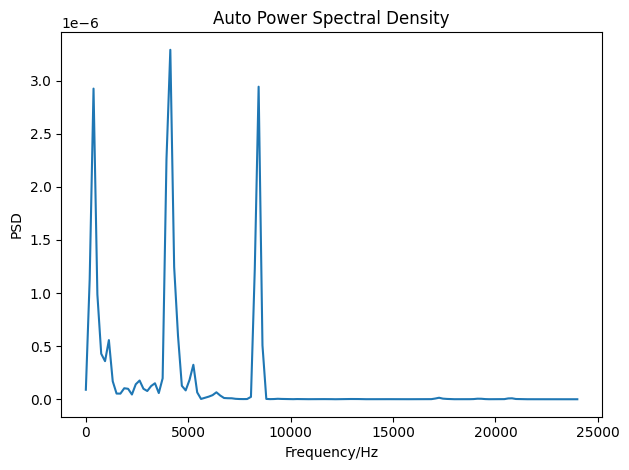

c:\Users\PC\.conda\envs\vonKarman\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\PC\.conda\envs\vonKarman\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


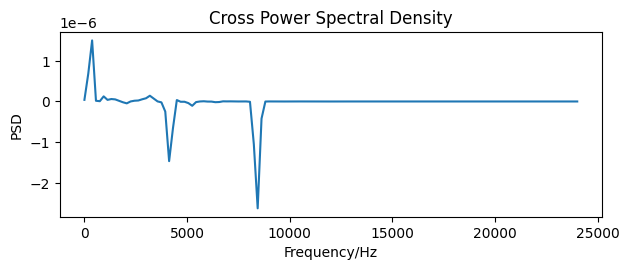

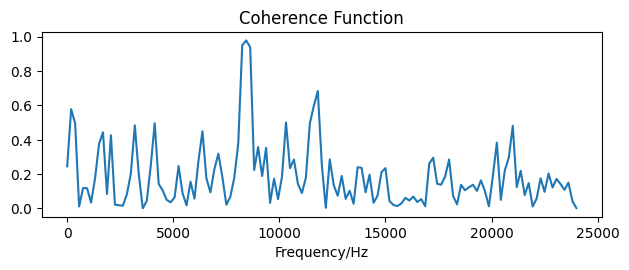

In [2]:
# 频域分析
fig1 = pd.read_csv(PATH + 'csvFigure/N_FE.csv')
fig2 = pd.read_csv(PATH + 'csvFigure/N_DE.csv')
fs = 48000

signal1 = np.squeeze(np.array(fig1))
signal1 = signal1[:2000]
signal2 = np.squeeze(np.array(fig2))
signal2 = signal2[:2000]

# FFT
FFT = FD.FourierTransform(fs, signal1)
time = np.arange(0, len(signal1))/fs
FFT.plot()    

# PSD
PSD = FD.PowerSpectralDensity(fs, signal1)
PSD.plot()
# 可见功率谱密度的尖峰位置与FFT结果相近

# 可绘制互功率谱密度与相干函数
Cross = FD.PowerSpectralDensity(fs, signal1, signal2)
Cross.plot()
        

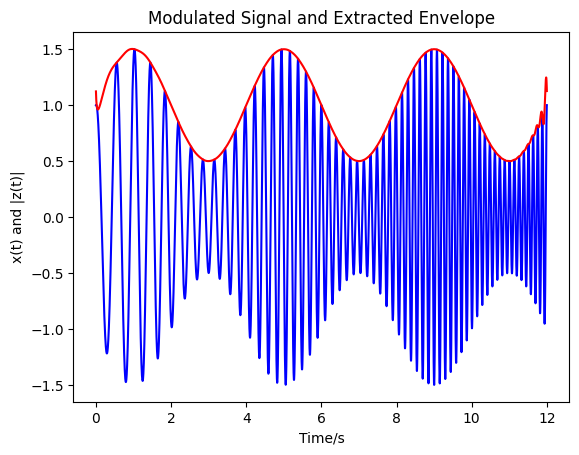

In [3]:
# Hilbert包络谱
# 其只对IMF信号有效，因此创建一满足条件的信号
duration = 1.0
fsTest = 4000
samples = int(fs*duration)
t = np.arange(samples) / fs

chirpfs_min = 20 # 载波频率下界
chirpfs_max = 100

signalTest = sig.chirp(t, chirpfs_min, t[-1], chirpfs_max)
signalTest *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

Env = FD.EnvelopeSpectrum(fsTest, signalTest)      
Env.plot(fsTest, signalTest)